#### 1. Read and Show Video File.

In [2]:
import cv2

cap = cv2.VideoCapture("E:/OpenCV/Video_Car.mp4")

while (cap.isOpened()):
    # ret = True or False if Video reads frame successfully
    # frame = read frame from video.
    ret, frame = cap.read()
    # convert BGR(Blue Green Red) to Gray Scale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('original', frame)
    cv2.imshow('gray', gray)
    k = cv2.waitKey(60) & 0xFF
    # k = 27 (ord for ESC key)
    if k == ord('q') or k == 27:
        break
cap.release()
cv2.destroyAllWindows()

#### 2. OpenCV - Video Stats.

Display Frame Count: 1888.0
Display Frame Height: 720.0
Display Frame Width: 634.0
Display FPS: 29.97002997002997


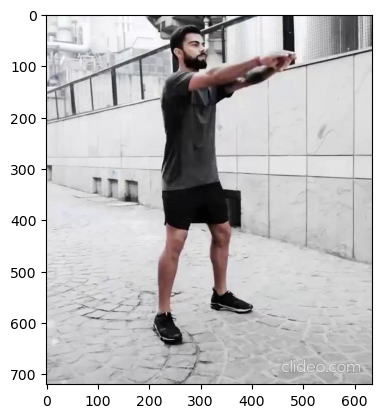

In [3]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('E:/OpenCV/Squat_Video.mp4')
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print("Display Frame Count:", cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Display Frame Height:", cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("Display Frame Width:", cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Display FPS:",cap.get(cv2.CAP_PROP_FPS))

# Render Frame
plt.imshow(frame)
plt.show()
cap.release()
cv2.destroyAllWindows()

#### 3. Edge Detection using OpenCV

In [5]:
import cv2
# Get contours of video frame using Canny Filter
cap = cv2.VideoCapture('E:/OpenCV/Video.avi')
while (cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (840,680), fx = 200, fy = 300, interpolation = cv2.INTER_NEAREST)
    # OpenCV reads image as B,G,R format into GrayScale.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 70, 150)
    edges_high = cv2.Canny(gray, 180, 230)

    cv2.imshow('Original', frame)
    cv2.imshow('Edges', edges)
    cv2.imshow('Edges High', edges_high)

    k = cv2.waitKey(60) & 0xFF
    if k == ord('q') or k == 27:
        break
cap.release()
cv2.destroyAllWindows()

#### 4. Person Detection using HaarCascade

In [9]:
import cv2
person_cascade = cv2.CascadeClassifier('E:/OpenCV/haarcascade_fullbody.xml')
cap = cv2.VideoCapture('E:/OpenCV/Video.avi')
while (cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.resize(frame, (840,680), fx = 200, fy = 300, interpolation = cv2.INTER_NEAREST)
    # Convert frame into GrayScaale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect person in the frame
    person = person_cascade.detectMultiScale(gray, 1.3, 2)
    for (x, y, w, h) in person:
        # Draw rectangle on face using coordinates
        cv2.rectangle(frame, (x,y),(x+w,y+h), (255,255,255), 2)
    cv2.putText(frame, f'Persons: {len(person)}', (10,30), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,255), 2)
    cv2.imshow('Original', frame)
    k = cv2.waitKey(60) & 0xFF
    if k == ord('q') or k == 27:
        break
cap.release()
cv2.destroyAllWindows()

#### 5. Detect WebCam

In [11]:
import cv2
import imutils

# 0 - code for Primary Webcam 
vid = cv2.VideoCapture(0)
while (1):
    _, frame = vid.read()
    frame = imutils.resize(frame, width = 800)
    # Convert BGR Image to GrayScale Image
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Original', frame)
    cv2.imshow('Gray', gray)
    k = cv2.waitKey(60) & 0xFF
    if k == ord('q') or k == 27:
        break
cap.release()
cv2.destroyAllWindows()

#### 6. VideoAnalysis Face and Eyes Detection

In [ ]:
import cv2
import imutils

# cascade classifier , this will take haarcascade trained model to classify features as positive or negative
face_cascade = cv2.CascadeClassifier('E:/OpenCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:/OpenCV/haarcascade_eye.xml')
# Video is continious steam of images
# 0 - code for Primary Webcam
vid = cv2.VideoCapture(0)
while (1):
    _, frame = vid.read()
    # Resize the Image using Imutils
    frame = imutils.resize(frame, width = 800)
    # Convert BGR to GrayScale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 1.4 = threshold value of image features, 5 = number of nearest neighbours.
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        # Draw rectangle on face using coordinates
        cv2.rectangle(frame, (x,y),(x+w,y+h), (0,255,255), 2)
        # Region of Interest (ROI)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.8, 9)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh), (0,255,0), 2)
        
    cv2.imshow('Original',frame)
    
    k = cv2.waitKey(60) & 0xFF
    if k == ord('q') or k == 27:
        break
vid.release()
cv2.destroyAllWindows()